In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, silhouette_score, accuracy_score, mean_absolute_error, cohen_kappa_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.cluster import DBSCAN
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, randint
from sklearn.neighbors import NearestNeighbors
import plotly.express as px


In [2]:
df = pd.read_csv("updated_pollution_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


In [5]:
X = df.drop(["Air Quality"], axis=1)
y = df["Air Quality"]

In [6]:
correlation_matrix = X.corr()
print(correlation_matrix)

                               Temperature  Humidity     PM2.5      PM10  \
Temperature                       1.000000  0.466456  0.323840  0.425690   
Humidity                          0.466456  1.000000  0.273366  0.359156   
PM2.5                             0.323840  0.273366  1.000000  0.973005   
PM10                              0.425690  0.359156  0.973005  1.000000   
NO2                               0.591969  0.491977  0.333004  0.439916   
SO2                               0.568082  0.459804  0.299582  0.401849   
CO                                0.685258  0.567540  0.395179  0.518895   
Proximity_to_Industrial_Areas    -0.589564 -0.479646 -0.315766 -0.425018   
Population_Density                0.481692  0.411630  0.278957  0.365734   

                                    NO2       SO2        CO  \
Temperature                    0.591969  0.568082  0.685258   
Humidity                       0.491977  0.459804  0.567540   
PM2.5                          0.333004  0.299582 

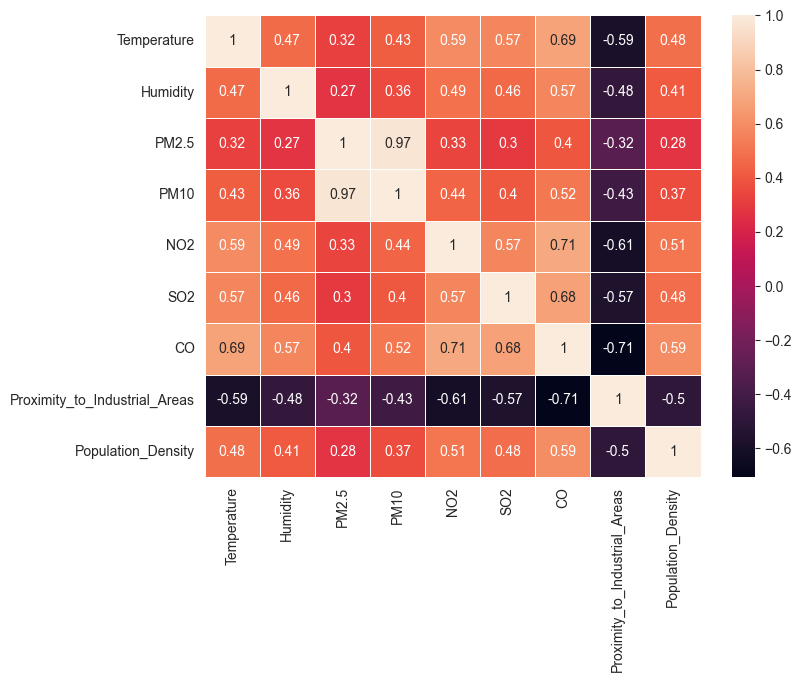

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, linewidth=.7)
plt.show()

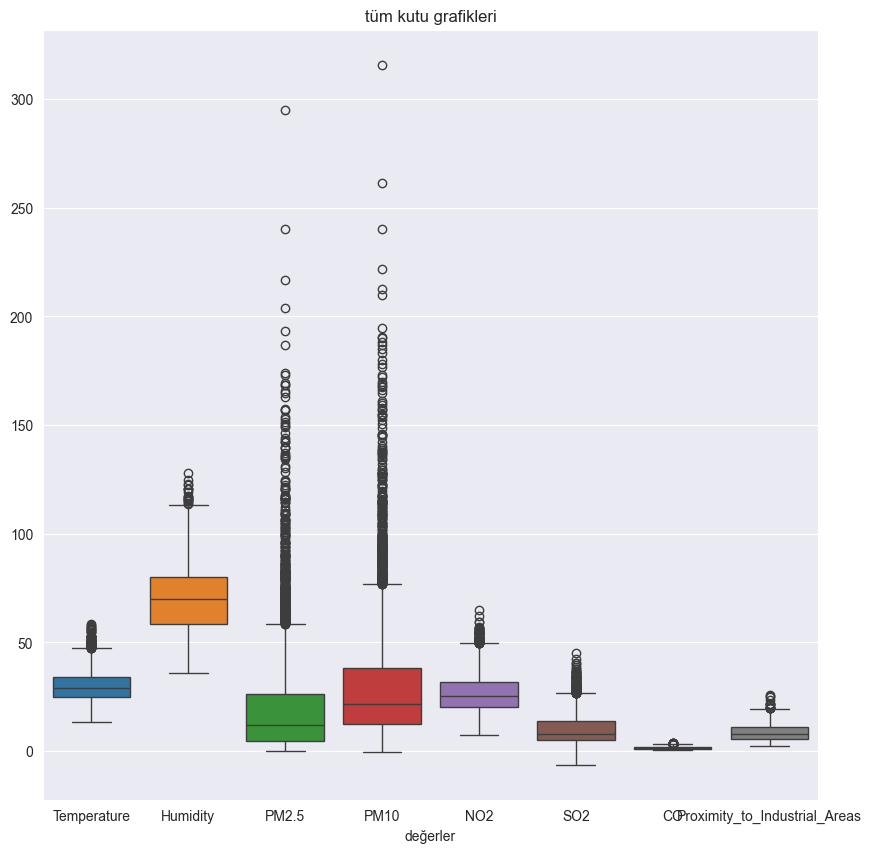

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[["Temperature", "Humidity", "PM2.5", "PM10" , "NO2", "SO2", "CO", "Proximity_to_Industrial_Areas"]])
plt.title("tüm kutu grafikleri")
plt.xlabel("değerler")
plt.show()

In [9]:
target_counts = y.value_counts()
print(target_counts)
print(target_counts / len(df) * 100)  # Yüzdelik dağılım


Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64
Air Quality
Good         40.0
Moderate     30.0
Poor         20.0
Hazardous    10.0
Name: count, dtype: float64


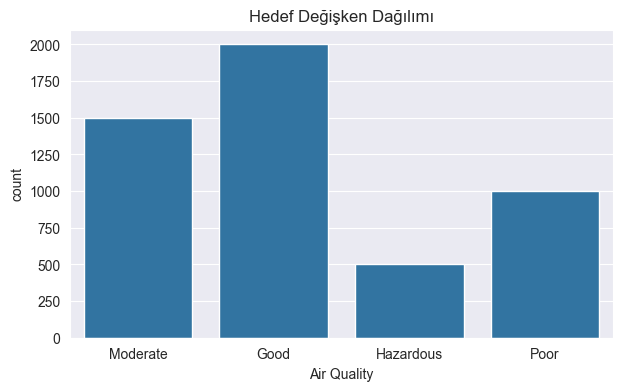

In [10]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Air Quality')
plt.title('Hedef Değişken Dağılımı')
plt.show()

In [11]:
quality = [['Hazardous', 'Poor', 'Moderate', 'Good']]

In [12]:
y = pd.get_dummies(df['Air Quality'])
print(y)

       Good  Hazardous  Moderate   Poor
0     False      False      True  False
1     False      False      True  False
2     False      False      True  False
3      True      False     False  False
4      True      False     False  False
...     ...        ...       ...    ...
4995  False       True     False  False
4996  False      False      True  False
4997  False      False      True  False
4998   True      False     False  False
4999  False      False      True  False

[5000 rows x 4 columns]


In [13]:
scaler = StandardScaler()

In [14]:
X_scaled = scaler.fit_transform(X)

In [15]:
y_series = y.idxmax(axis=1)

In [16]:
#outlier_mask = (np.abs(X_scaled) > 6).any(axis=1)
combined_mask = ((np.abs(X_scaled) > 3).any(axis=1)) # | mask_2 | mask_3
X_scaled = X_scaled[~combined_mask]
y = y_series[~combined_mask]


In [17]:
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(X_scaled, y)

In [18]:
le = LabelEncoder()
y_balanced = le.fit_transform(y_balanced)

In [19]:
print(x_balanced)
print("İlk 20 eleman:", y_balanced[:20])

[[-0.03408041 -0.69071534 -0.60858932 ...  0.40230264 -0.58865846
  -1.16816284]
 [-0.25729505  0.34950721 -0.72670554 ...  0.25577499 -0.67174754
   0.74359753]
 [-1.03110581  0.2927678   0.26709986 ...  0.23745904 -0.89331843
   0.79597453]
 ...
 [-0.40976462  0.04397175 -0.18543481 ...  0.88076977 -1.18878895
   0.52099529]
 [ 0.84277546  1.50484232 -0.42254238 ...  0.55381366 -1.14803354
   0.60559105]
 [ 0.52935468  0.39310258 -0.57003348 ...  0.64799196 -0.9038174
   1.48171004]]
İlk 20 eleman: [2 2 2 0 0 1 3 2 3 3 0 2 0 0 0 2 0 3 2 3]


In [20]:
pca = PCA(n_components=4)
X_reduced = pca.fit_transform(x_balanced)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_balanced, test_size=0.2, random_state=42)

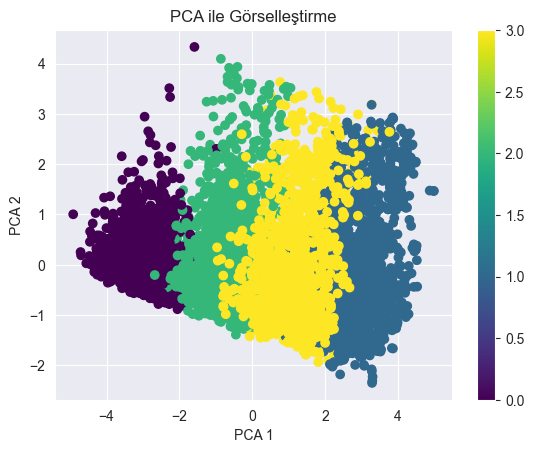

In [22]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_balanced, cmap='viridis')  # y_balanced varsa etiket olarak
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA ile Görselleştirme')
plt.colorbar()
plt.show()


In [23]:
# DataFrame
df_tsne = pd.DataFrame({
    'tsne1': X_reduced[:, 0],
    'tsne2': X_reduced[:, 1],
    'tsne3': X_reduced[:, 2],
    'label': y_balanced
})

# Etkileşimli 3B scatter plot
fig = px.scatter_3d(df_tsne, x='tsne1', y='tsne2', z='tsne3',
                    color=y_balanced,
                    title='3 Boyutlu t-SNE Görselleştirmesi',
                    labels={'tsne1': 't-SNE Boyut 1',
                            'tsne2': 't-SNE Boyut 2',
                            'tsne3': 't-SNE Boyut 3'},
                    color_continuous_scale='viridis')

fig.update_layout(
    width=500,  # piksel cinsinden genişlik
    height=500, # piksel cinsinden yükseklik
    autosize=False  # otomatik boyutlandırmayı kapat
)


fig.show()

LOGISTIC REGRESSION

In [24]:
param_grid =[ {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__solver': ['saga']
},
{'estimator__C': [0.01, 0.1, 1, 10, 100],
     'estimator__penalty': ['elasticnet'],
     'estimator__solver': ['saga'],
     'estimator__l1_ratio': [0.2, 0.5, 0.8]} ]

reg = OneVsRestClassifier(LogisticRegression(max_iter=5000))
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,OneVsRestClas...ax_iter=5000))
,param_grid,"[{'estimator__C': [0.01, 0.1, ...], 'estimator__penalty': ['l1', 'l2'], 'estimator__solver': ['saga']}, {'estimator__C': [0.01, 0.1, ...], 'estimator__l1_ratio': [0.2, 0.5, ...], 'estimator__penalty': ['elasticnet'], 'estimator__solver': ['saga']}]"
,scoring,'roc_auc_ovr'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'elasticnet'


In [25]:
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi ROC AUC skoru:", grid_search.best_score_)

# En iyi modeli kullanın
model = grid_search.best_estimator_

En iyi hiperparametreler: {'estimator__C': 0.01, 'estimator__l1_ratio': 0.2, 'estimator__penalty': 'elasticnet', 'estimator__solver': 'saga'}
En iyi ROC AUC skoru: 0.95881192806992


In [26]:
#PREDICT
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#ROC AUC için olasılık predict
y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

In [27]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.8568
Test Verisi Doğruluğu (Testing Accuracy): 0.8571


In [28]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc:.4f}")

Eğitim Verisi ROC AUC Skoru: 0.9589
Test Verisi ROC AUC Skoru: 0.9607


In [29]:
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_test))


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       428
           1       0.74      0.94      0.83       348
           2       0.89      0.87      0.88       394
           3       0.85      0.63      0.72       418

    accuracy                           0.86      1588
   macro avg       0.86      0.86      0.85      1588
weighted avg       0.86      0.86      0.85      1588



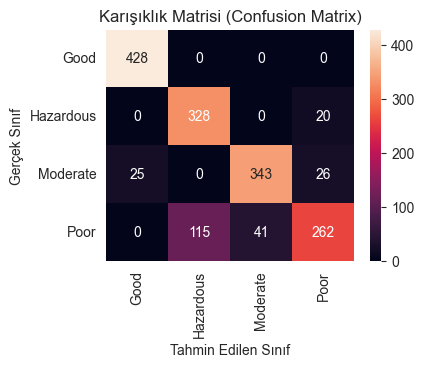

In [30]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [31]:
mae_lr = mean_absolute_error(y_test, y_pred_test)
qwk_lr = cohen_kappa_score(y_test, y_pred_test, weights='quadratic')

print(f"MAE: {mae_lr:.4f}")
print(f"QWK: {qwk_lr:.4f}")

MAE: 0.2437
QWK: 0.8237


Decision Tree

In [32]:
tree = DecisionTreeClassifier(random_state=42)
model = tree.fit(X_train, y_train)

param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None]
}
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1)


In [33]:
model_tree = grid_search.fit(X_train, y_train)


In [34]:
print("--- Grid Search for Decision Tree ---")
print(f"En İyi Parametreler: {model_tree.best_params_}")
print(f"En İyi ROC AUC Skoru: {model_tree.best_score_:.4f}")


--- Grid Search for Decision Tree ---
En İyi Parametreler: {'max_depth': 5}
En İyi ROC AUC Skoru: 0.9711


In [35]:
model = model_tree.best_estimator_

In [36]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

In [37]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.8874
Test Verisi Doğruluğu (Testing Accuracy): 0.8917


In [38]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc:.4f}")

Eğitim Verisi ROC AUC Skoru: 0.9761
Test Verisi ROC AUC Skoru: 0.9732


In [39]:
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_test))


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       428
           1       0.88      0.84      0.86       348
           2       0.91      0.89      0.90       394
           3       0.79      0.83      0.81       418

    accuracy                           0.89      1588
   macro avg       0.89      0.89      0.89      1588
weighted avg       0.89      0.89      0.89      1588



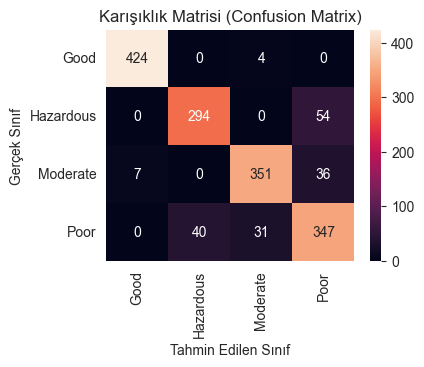

In [40]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [41]:
mae_dt = mean_absolute_error(y_test, y_pred_test)
qwk_dt = cohen_kappa_score(y_test, y_pred_test, weights='quadratic')

print(f"MAE: {mae_dt:.4f}")
print(f"QWK: {qwk_dt:.4f}")

MAE: 0.1744
QWK: 0.8846


RANDOM FOREST

In [42]:
rf = RandomForestClassifier(random_state=42)

In [43]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
}

In [44]:
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc_ovr', n_jobs=-1)

In [45]:
model_rf = grid_search_rf.fit(X_train, y_train)

In [46]:
print("--- Rastgele Orman için Grid Search Sonuçları ---")
print(f"En İyi Parametreler: {model_rf.best_params_}")
print(f"En İyi ROC AUC Skoru: {model_rf.best_score_:.4f}")

--- Rastgele Orman için Grid Search Sonuçları ---
En İyi Parametreler: {'max_depth': None, 'n_estimators': 300}
En İyi ROC AUC Skoru: 0.9885


In [47]:
model = model_rf.best_estimator_


In [48]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

In [50]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc:.4f}")

Eğitim Verisi ROC AUC Skoru: 1.0000
Test Verisi ROC AUC Skoru: 0.9899


In [49]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 1.0000
Test Verisi Doğruluğu (Testing Accuracy): 0.9339


In [51]:
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_test))


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       428
           1       0.92      0.94      0.93       348
           2       0.93      0.93      0.93       394
           3       0.89      0.87      0.88       418

    accuracy                           0.93      1588
   macro avg       0.93      0.93      0.93      1588
weighted avg       0.93      0.93      0.93      1588



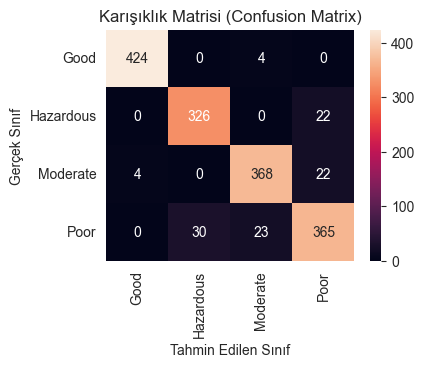

In [52]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [53]:
mae_rf = mean_absolute_error(y_test, y_pred_test)
qwk_rf = cohen_kappa_score(y_test, y_pred_test, weights='quadratic')

print(f"MAE: {mae_rf:.4f}")
print(f"QWK: {qwk_rf:.4f}")

MAE: 0.1039
QWK: 0.9315


SVM(SVC)

In [54]:
svc_model = OneVsRestClassifier(SVC(probability=True, random_state=42))

In [55]:
param_distributions_svc = {
    'estimator__C': reciprocal(0.01, 1000),
    'estimator__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [56]:
random_search_svc = RandomizedSearchCV(svc_model, param_distributions_svc, n_iter=10 ,cv=5, scoring='roc_auc_ovr', n_jobs=-1, random_state=42)

In [57]:
smodel_sv = random_search_svc.fit(X_train, y_train)

In [58]:
print("--- SVC için Grid Search Sonuçları ---")
print(f"En İyi Parametreler: {model_sv.best_params_}")
print(f"En İyi ROC AUC Skoru: {model_sv.best_score_:.4f}")

--- SVC için Grid Search Sonuçları ---
En İyi Parametreler: {'estimator__C': np.float64(145.28246637516014), 'estimator__kernel': 'rbf'}
En İyi ROC AUC Skoru: 0.9838


In [59]:
model = model_sv.best_estimator_

In [60]:
#PREDICT
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#ROC AUC için olasılık predict
y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

In [61]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.9151
Test Verisi Doğruluğu (Testing Accuracy): 0.9074


In [62]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc:.4f}")

Eğitim Verisi ROC AUC Skoru: 0.9870
Test Verisi ROC AUC Skoru: 0.9868


In [63]:
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_test))


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       428
           1       0.86      0.87      0.86       348
           2       0.92      0.95      0.93       394
           3       0.85      0.81      0.83       418

    accuracy                           0.91      1588
   macro avg       0.90      0.91      0.91      1588
weighted avg       0.91      0.91      0.91      1588



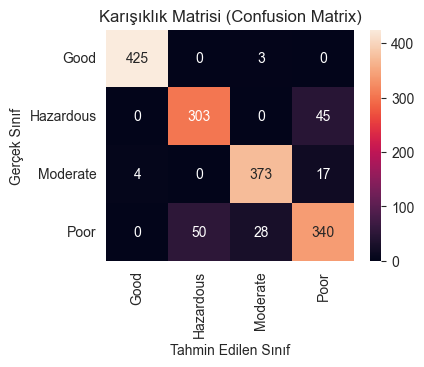

In [64]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [65]:
mae_svc = mean_absolute_error(y_test, y_pred_test)
qwk_svc = cohen_kappa_score(y_test, y_pred_test, weights='quadratic')

print(f"MAE: {mae_svc:.4f}")
print(f"QWK: {qwk_svc:.4f}")

MAE: 0.1568
QWK: 0.8908


KNN

In [66]:
knn_model = KNeighborsClassifier()

In [67]:
param_distributions_knn = {
    'n_neighbors': randint(1, 21),  # 1'den 20'ye kadar rastgele bir sayı seç
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [68]:
random_search_knn = RandomizedSearchCV(knn_model, param_distributions_knn, n_iter=50, cv=5, scoring='roc_auc_ovr', n_jobs=-1, random_state=42)

In [69]:
model = random_search_knn.fit(X_train, y_train)

In [70]:
print("--- KNN için Randomized Search Sonuçları ---")
print(f"En İyi Parametreler: {model.best_params_}")
print(f"En İyi ROC AUC Skoru: {model.best_score_:.4f}")

--- KNN için Randomized Search Sonuçları ---
En İyi Parametreler: {'n_neighbors': 17, 'p': 2, 'weights': 'distance'}
En İyi ROC AUC Skoru: 0.9891


In [71]:
best_knn_model = model.best_estimator_

In [72]:
y_pred_train = best_knn_model.predict(X_train)
y_pred_test = best_knn_model.predict(X_test)
y_pred_proba_train = best_knn_model.predict_proba(X_train)
y_pred_proba_test = best_knn_model.predict_proba(X_test)

In [73]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nEğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")


Eğitim Verisi Doğruluğu (Training Accuracy): 1.0000
Test Verisi Doğruluğu (Testing Accuracy): 0.9332


In [74]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc:.4f}")

Eğitim Verisi ROC AUC Skoru: 1.0000
Test Verisi ROC AUC Skoru: 0.9920


In [75]:
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_test))


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       428
           1       0.89      0.95      0.92       348
           2       0.93      0.95      0.94       394
           3       0.91      0.84      0.87       418

    accuracy                           0.93      1588
   macro avg       0.93      0.93      0.93      1588
weighted avg       0.93      0.93      0.93      1588



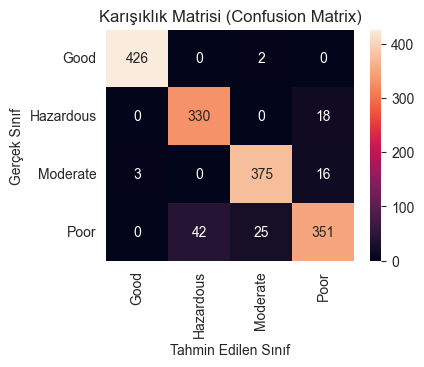

In [76]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [77]:
mae_knn = mean_absolute_error(y_test, y_pred_test)
qwk_knn = cohen_kappa_score(y_test, y_pred_test, weights='quadratic')

print(f"MAE: {mae_knn:.4f}")
print(f"QWK: {qwk_knn:.4f}")

MAE: 0.1077
QWK: 0.9268


In [78]:
#elbow metodu
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [79]:
wcss

[45997.40445488107,
 21860.585248845982,
 18337.268692845304,
 13923.338601097517,
 13281.535814709237,
 11963.92694492972,
 10835.54002104474,
 10387.832168720415,
 9695.961542047204,
 9340.839348313748]

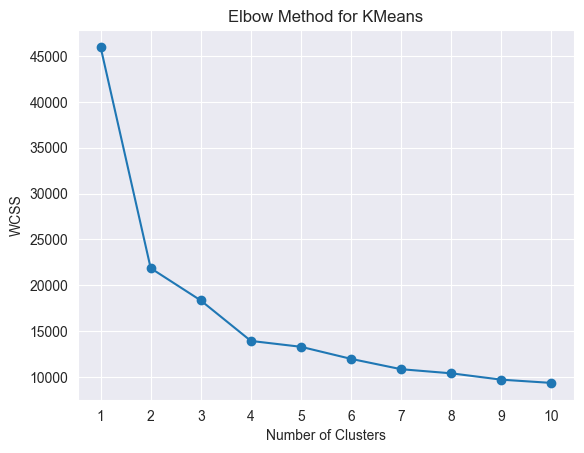

In [80]:
plt.plot(range(1, 11), wcss, marker="o")
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for KMeans")
plt.show()


In [81]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_train)

# PCA ile görselleştirme
pca_vis = PCA(n_components=3)
X_vis = pca_vis.fit_transform(X_train)


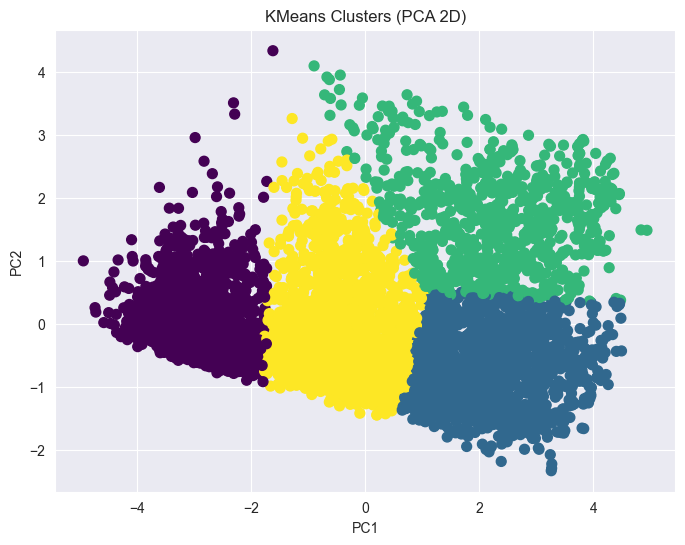

In [82]:
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=clusters_kmeans, cmap="viridis", s=50)
plt.title("KMeans Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [83]:
skor = silhouette_score(X_train, clusters_kmeans)
print(skor)

0.31171371442852674


In [84]:
X_tsne = TSNE(n_components=3, random_state=42).fit_transform(X_train)

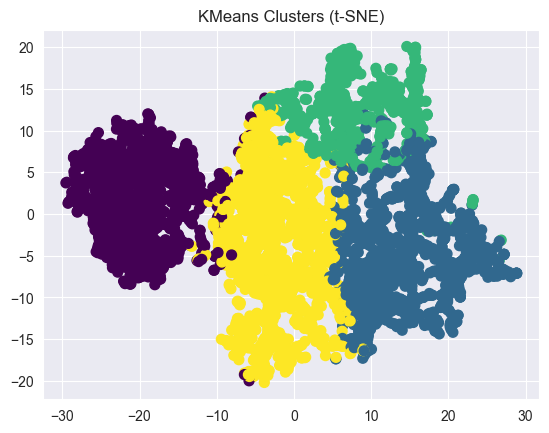

In [85]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters_kmeans, cmap="viridis", s=50)
plt.title("KMeans Clusters (t-SNE)")
plt.show()

In [86]:
# DataFrame
df_tsne = pd.DataFrame({
    'tsne1': X_tsne[:, 0],
    'tsne2': X_tsne[:, 1],
    'tsne3': X_tsne[:, 2],
    'label': y_train
})

# Etkileşimli 3B scatter plot
fig = px.scatter_3d(df_tsne, x='tsne1', y='tsne2', z='tsne3',
                    color=clusters_kmeans,
                    title='3 Boyutlu t-SNE Görselleştirmesi',
                    labels={'tsne1': 't-SNE Boyut 1',
                            'tsne2': 't-SNE Boyut 2',
                            'tsne3': 't-SNE Boyut 3'},
                    color_continuous_scale='viridis')

fig.update_layout(
    width=500,  # piksel cinsinden genişlik
    height=500, # piksel cinsinden yükseklik
    autosize=False  # otomatik boyutlandırmayı kapat
)


fig.show()

DBSCAN

In [87]:
min_samples=4
neigh = NearestNeighbors(n_neighbors=min_samples)
distances, indices = neigh.fit(X_train).kneighbors(X_train)

# En yakın min_samples'inci komşunun mesafelerini sıralama
distances = np.sort(distances[:, min_samples - 1], axis=0)

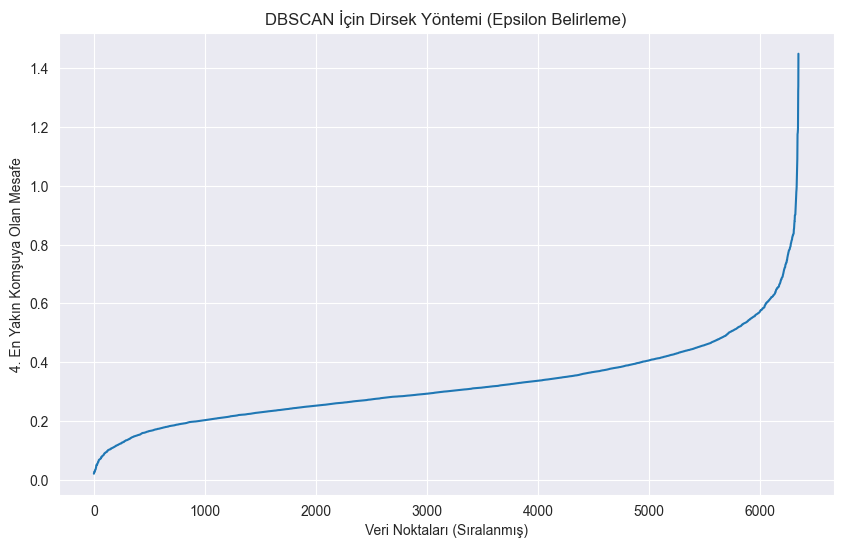

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel("Veri Noktaları (Sıralanmış)")
plt.ylabel(f"{min_samples}. En Yakın Komşuya Olan Mesafe")
plt.title("DBSCAN İçin Dirsek Yöntemi (Epsilon Belirleme)")
plt.grid(True)
plt.show()

In [89]:
dbscan = DBSCAN(eps=0.6, min_samples=6)
clusters = dbscan.fit_predict(X_train)

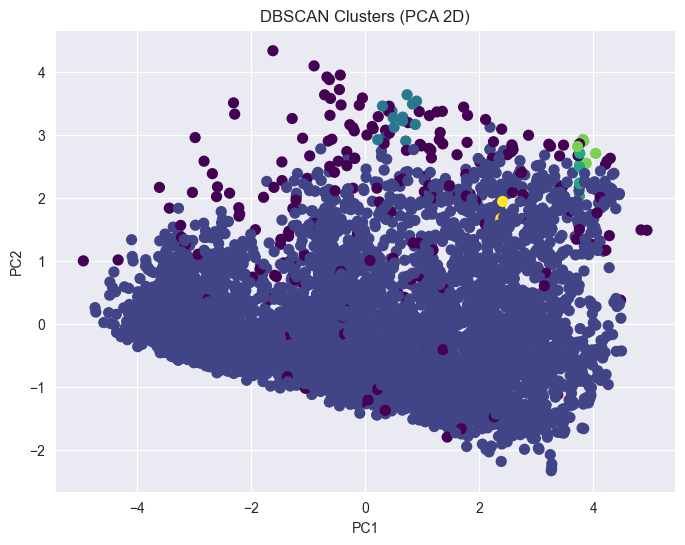

In [90]:
#PCA GÖRSELLEŞTİRME
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [91]:
skor = silhouette_score(X_train, clusters)
print(skor)

0.04562391429991338


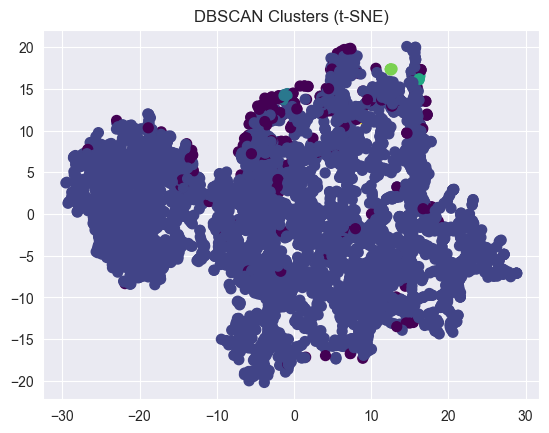

In [92]:
#TSNE GÖRSELLEŞTİRME
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters, cmap="viridis", s=50)
plt.title("DBSCAN Clusters (t-SNE)")
plt.show()

In [93]:
# DataFrame
df_tsne = pd.DataFrame({
    'tsne1': X_tsne[:, 0],
    'tsne2': X_tsne[:, 1],
    'tsne3': X_tsne[:, 2],
    'label': y_train
})

# Etkileşimli 3B scatter plot
fig = px.scatter_3d(df_tsne, x='tsne1', y='tsne2', z='tsne3',
                    color=clusters,
                    title='3 Boyutlu t-SNE Görselleştirmesi',
                    labels={'tsne1': 't-SNE Boyut 1',
                            'tsne2': 't-SNE Boyut 2',
                            'tsne3': 't-SNE Boyut 3'},
                    color_continuous_scale='viridis')

fig.update_layout(
    width=500,  # piksel cinsinden genişlik
    height=500, # piksel cinsinden yükseklik
    autosize=False  # otomatik boyutlandırmayı kapat
)


fig.show()

HDBSCAN

In [94]:
hdbscan = HDBSCAN(min_samples=6)
h_clusters = hdbscan.fit_predict(X_train)

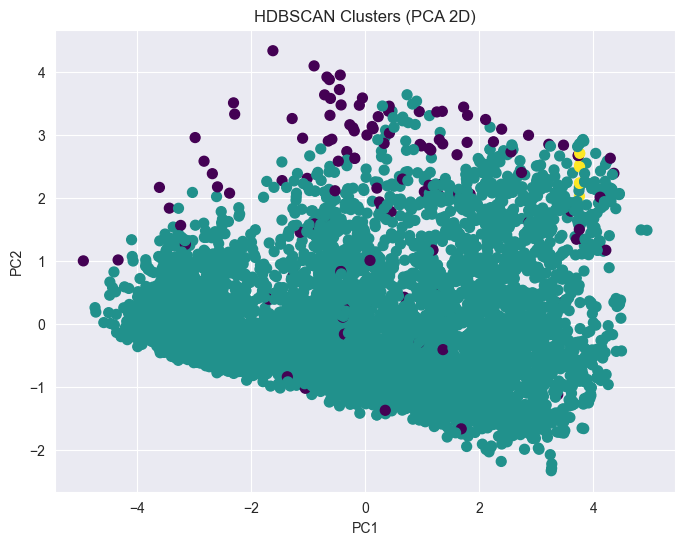

In [95]:
#PCA GÖRSELLEŞTİRME
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=h_clusters, cmap="viridis", s=50)
plt.title("HDBSCAN Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [96]:
skor = silhouette_score(X_train, h_clusters)
print(skor)

0.14351886304177885


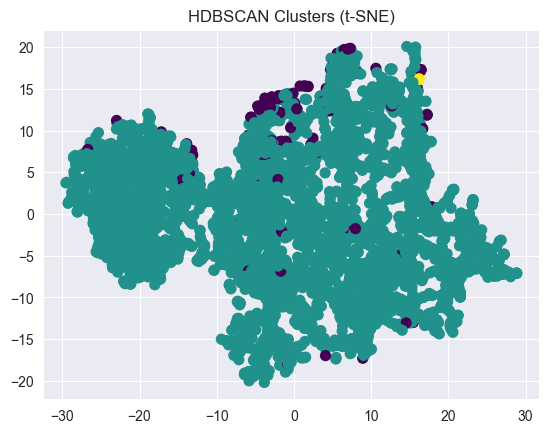

In [97]:
#TSNE GÖRSELLEŞTİRME
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=h_clusters, cmap="viridis", s=50)
plt.title("HDBSCAN Clusters (t-SNE)")
plt.show()


In [98]:
# DataFrame
df_tsne = pd.DataFrame({
    'tsne1': X_tsne[:, 0],
    'tsne2': X_tsne[:, 1],
    'tsne3': X_tsne[:, 2],
    'label': y_train
})

# Etkileşimli 3B scatter plot
fig = px.scatter_3d(df_tsne, x='tsne1', y='tsne2', z='tsne3',
                    color=h_clusters,
                    title='3 Boyutlu t-SNE Görselleştirmesi',
                    labels={'tsne1': 't-SNE Boyut 1',
                            'tsne2': 't-SNE Boyut 2',
                            'tsne3': 't-SNE Boyut 3'},
                    color_continuous_scale='viridis')

fig.update_layout(
    width=500,  # piksel cinsinden genişlik
    height=500, # piksel cinsinden yükseklik
    autosize=False  # otomatik boyutlandırmayı kapat
)


fig.show()

In [100]:
"""
YAPILACAKLAR:
2)genel inceleme özellikle değişken isimleri
3)hangi işlem hangi parametreyi
"""

'\nYAPILACAKLAR:\n2)genel inceleme özellikle değişken isimleri\n3)hangi işlem hangi parametreyi\n'

In [101]:
models = {
   'Logistic Regression': {'MAE': mae_lr, 'QWK': qwk_lr},
   'Decision Tree': {'MAE': mae_dt, 'QWK': qwk_dt},
   'Random Forest': {'MAE': mae_rf, 'QWK': qwk_rf},
   'SVM': {'MAE': mae_svc, 'QWK': qwk_svc},
   'KNN': {'MAE': mae_knn, 'QWK': qwk_knn}
}

In [102]:
for i in models:
    print(f"Model {i}: {models[i]}")

best_model = min(models.items(), key=lambda x: x[1]['MAE'])[0]
print(f"En iyi: {best_model} ama KNN'de çok yakın")

Model Logistic Regression: {'MAE': 0.24370277078085642, 'QWK': 0.8237122557726465}
Model Decision Tree: {'MAE': 0.17443324937027707, 'QWK': 0.8846421884565219}
Model Random Forest: {'MAE': 0.10390428211586902, 'QWK': 0.9314918779623579}
Model SVM: {'MAE': 0.15680100755667506, 'QWK': 0.8907947214503624}
Model KNN: {'MAE': 0.10768261964735516, 'QWK': 0.926844334303461}
En iyi: Random Forest ama KNN'de çok yakın


In [ ]:
"""
ORDINAL ENCODING GENEL ANLAMDA DAHA İYİ GÖRÜNÜYOR FAKAT ŞÖYLE BİR FARK VAR: KÖTÜ OLAN AYRIMI ORDINAL ENCODING DAHA İYİ YAPABİLİRKEN İYİ OLAN AYRIMI NON ORD DAHA İYİ YAPABİLİYOR.
"""